In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

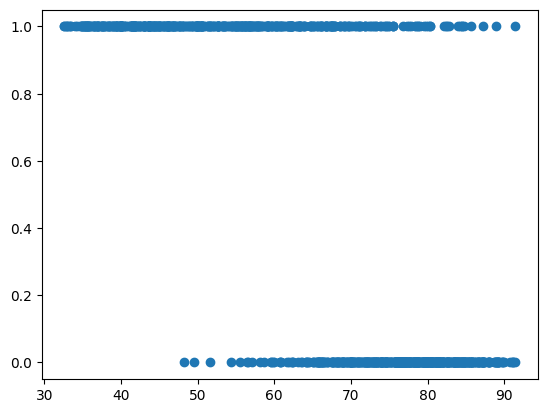

In [6]:
plt.scatter(df['Daily Time Spent on Site'],df['Clicked on Ad'])

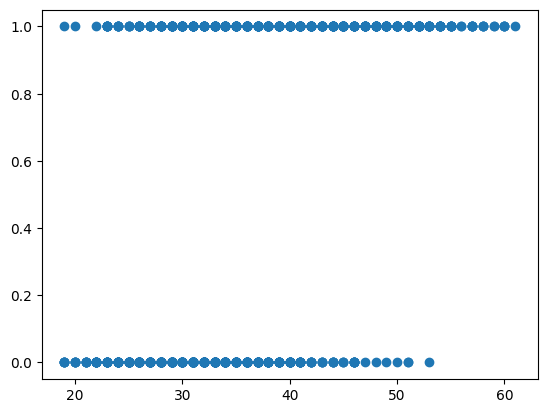

In [7]:
plt.scatter(df['Age'],df['Clicked on Ad'])

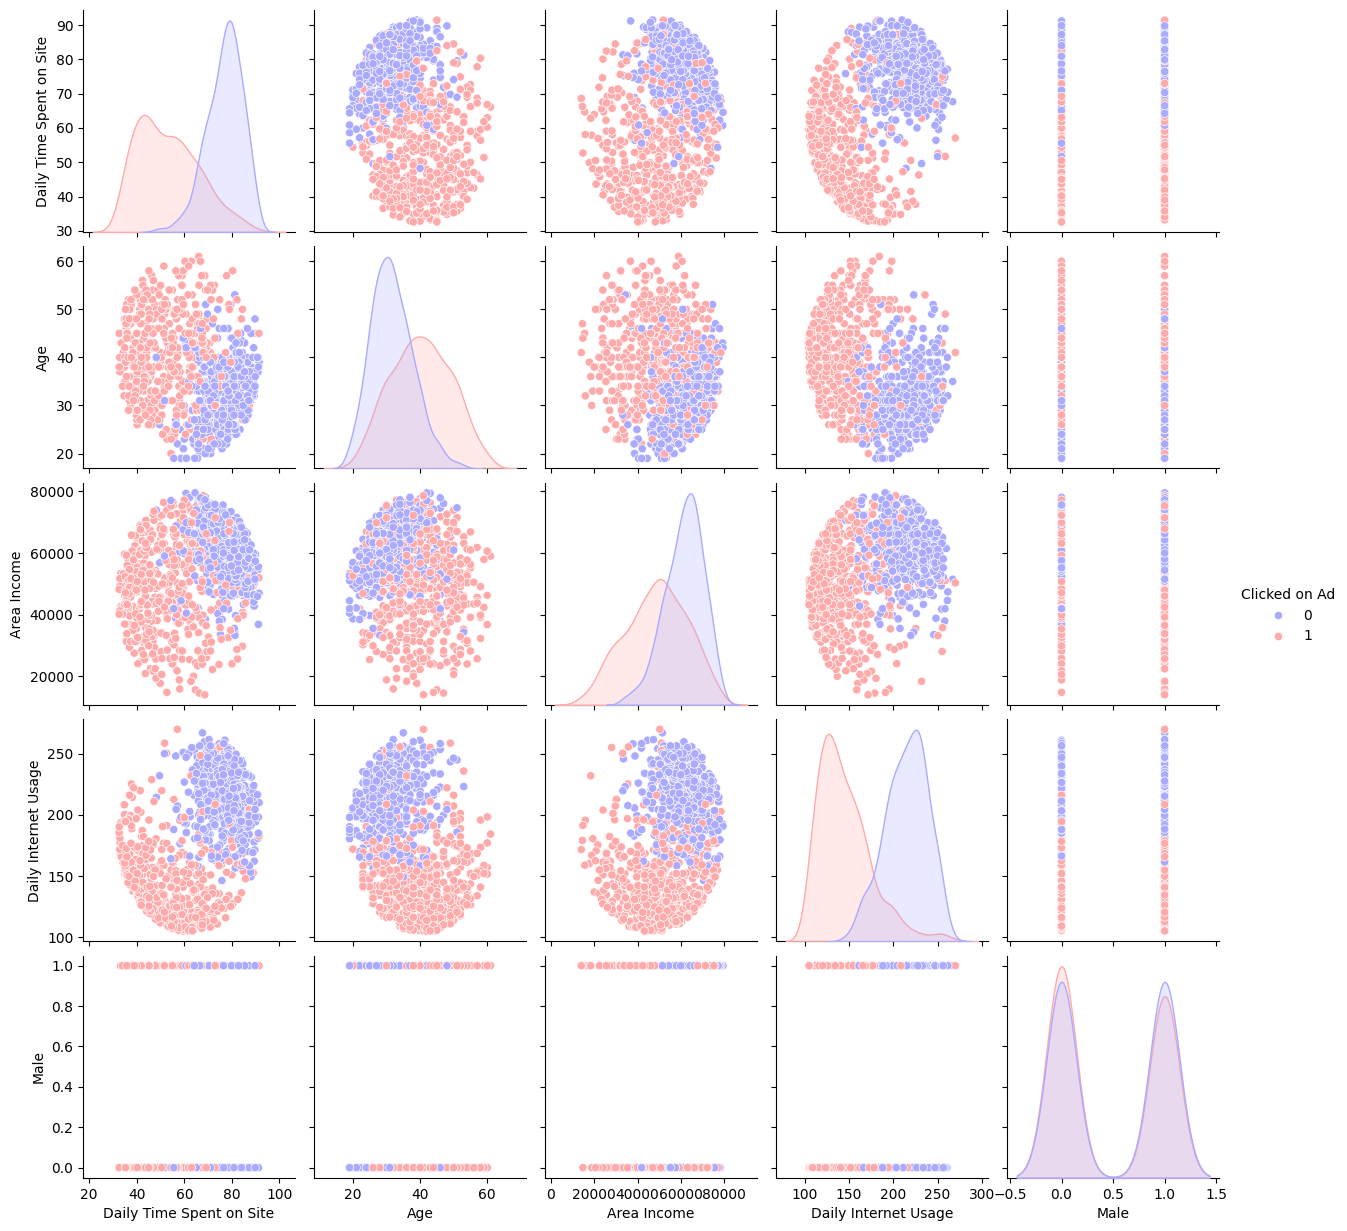

In [8]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

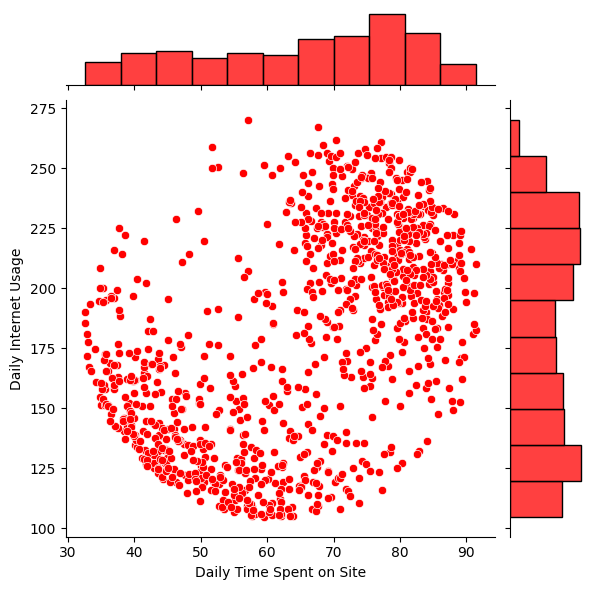

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='red')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
sub_df = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Clicked on Ad']]
sub_df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [12]:
sub_df.corr()

Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad                        -0.786539 -0.038027       1.000000

<Axes: >

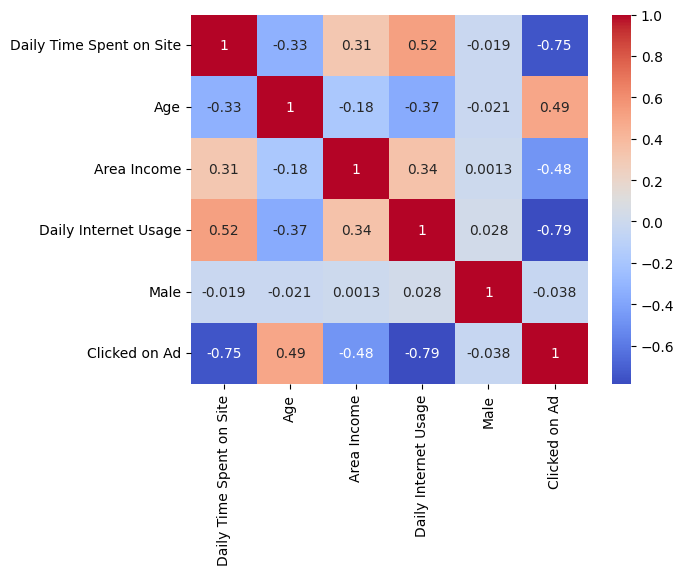

In [13]:
sns.heatmap(sub_df.corr(),cmap='coolwarm',annot=True)

In [14]:
X = sub_df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = sub_df[['Clicked on Ad']]

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X=scalar.fit_transform(X)
#y=scalar.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [18]:
regression.fit(x_train,y_train)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
predictions = regression.predict(x_test)

In [20]:
regression.score(x_test,y_test)

0.98

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
cm = confusion_matrix(y_test,predictions)
cm

array([[105,   0],
       [  4,  91]])

In [23]:
np.unique_counts(predictions)

UniqueCountsResult(values=array([0, 1]), counts=array([109,  91]))

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.96      0.98        95

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      Clicked on Ad
0                0
1                0
2                0
3                0
4                0
..             ...
995              1
996              1
997              1
998              0
999              1

[1000 rows x 1 columns]

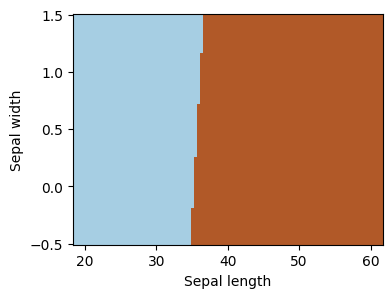

In [25]:
from sklearn.inspection import DecisionBoundaryDisplay
X = df[['Age','Male']]
Y = df[['Clicked on Ad']]
reg = LogisticRegression()
reg.fit(X,Y)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    reg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X['Age'], X['Male'], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()